In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [28]:
# Load air quality data, drop the index column and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:, 1:].dropna()

In [29]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [30]:
# Recode strings to numeric.
df['default'] = np.where(df['default'] == 'Yes', 1, 0)
df['student'] = np.where(df['student'] == 'Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

### Ridge Regression

In [34]:
# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train = df_train['income'].values.reshape(-1, 1)

#Returns columns only where income is populated
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

regr1.fit(X_train, Y_train)
print('R-squared simple model:')
print(regr1.score(X_train, Y_train))

R-squared simple model:
0.5738784962717032


In [36]:
X_train2

,default,student,balance,balance_student,balance_default,student_default,balance_sqrt,balance2,balance3
0,-0.185599,-0.645936,-0.218835,0.141353,0.040616,0.119885,9.989052,9956.280924,9.934493e+05
1,-0.185599,1.548141,-0.037616,-0.058235,0.006981,-0.287334,9.998119,9992.478229,9.988719e+05
2,-0.185599,-0.645936,0.492410,-0.318066,-0.091391,0.119885,10.024590,10098.724506,1.014845e+06
3,-0.185599,-0.645936,-0.632893,0.408808,0.117464,0.119885,9.968305,9873.822052,9.811331e+05
4,-0.185599,-0.645936,-0.102791,0.066396,0.019078,0.119885,9.994859,9979.452390,9.969194e+05
5,-0.185599,1.548141,0.174106,0.269541,-0.032314,-0.287334,10.008702,10034.851585,1.005232e+06
6,-0.185599,-0.645936,-0.020388,0.013169,0.003784,0.119885,9.998981,9995.922788,9.993885e+05
7,-0.185599,1.548141,-0.055216,-0.085482,0.010248,-0.287334,9.997239,9988.959886,9.983444e+05
8,-0.185599,-0.645936,0.673329,-0.434927,-0.124969,0.119885,10.033610,10135.119141,1.020336e+06
9,-0.185599,-0.645936,-1.727085,1.115586,0.320546,0.119885,9.913270,9657.565919,9.490772e+05


In [37]:
#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_)

# Make new features to capture potential quadratic and cubic relationships
# between the features.
# This adds some additional insight into the variance in our data
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

# Re-run the model with the new features.
regrBig = linear_model.LinearRegression()
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]
regrBig.fit(X_train2, Y_train)
print('R-squared complex model:')
print(regrBig.score(X_train2, Y_train))

#Learns a little bit more about the variance in our data

R-squared complex model:
0.5739734452071859


In [38]:
# Store the new parameter estimates for the same features.
newparams = np.append(
    regrBig.coef_[0,0:(len(origparams)-1)],
    regrBig.intercept_)

print('Parameter Estimates for the same predictors for the small model '
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)

Parameter Estimates for the same predictors for the small model and large model:
[[0.014 -0.004]
 [-0.759 -0.759]
 [0.000 4157.866]
 [-0.001 553434.550]]


In [39]:
# Test the simpler model with smaller coefficients. 
# refers to what we did orignally with less features
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]
print('\nR-squared simple model:')
print(regr1.score(X_test, Y_test))

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3

# Re-run the model with the new features.
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]
print('\nR-squared complex model:')
print(regrBig.score(X_test2, Y_test))


R-squared simple model:
0.5630697922503316

R-squared complex model:
0.5630239527341394


In [41]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model'
      ' and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)

0.573873916440288
[ 1.36988466e-02 -7.57859433e-01 -3.25298557e-04]
0.5739464289613441

Parameter Estimates for the same predictors for the small model and large model:
[[0.014 -0.002]
 [-0.758 -0.757]
 [-0.000 0.048]]


In [43]:
compare

array([[ 1.36988466e-02, -2.18345205e-03],
       [-7.57859433e-01, -7.57156891e-01],
       [-3.25298557e-04,  4.77049992e-02]])

In [44]:
print(ridgeregr.score(X_test, Y_test))
print(ridgeregrBig.score(X_test2, Y_test))

0.5631088763076704
0.5631804323930691


### Ridge regression: Regularization parameter and parameter estimate size

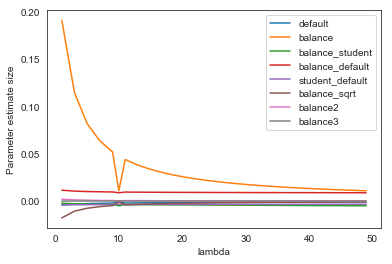

In [52]:
# Store estimates.
estimates = np.append(ridgeregrBig.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregrBig.coef_,[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train2.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
varstoplot.remove('student')

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

In [53]:
estimates

array([[-8.58908240e-04, -7.50726130e-01,  1.08472658e-02,
        -5.10099101e-03,  8.73227614e-03, -3.41821807e-03,
        -1.01702820e-03,  1.21532808e-04, -1.20811914e-06,
         1.00000000e+01],
       [-4.27783832e-03, -7.58734740e-01,  1.91749286e-01,
        -2.30805621e-03,  1.14873174e-02, -4.20909187e-03,
        -1.79503527e-02,  1.95202109e-03, -1.93416478e-05,
         1.00000000e+00],
       [-3.22846210e-03, -7.58358018e-01,  1.15052488e-01,
        -2.94851047e-03,  1.04649007e-02, -4.00180082e-03,
        -1.07819232e-02,  1.16900315e-03, -1.15842033e-05,
         3.00000000e+00],
       [-2.75035289e-03, -7.58006613e-01,  8.20932500e-02,
        -3.25822468e-03,  1.00153856e-02, -3.90435470e-03,
        -7.69484400e-03,  8.32936625e-04, -8.25484780e-06,
         5.00000000e+00],
       [-2.46354164e-03, -7.57663877e-01,  6.37597191e-02,
        -3.45726263e-03,  9.75757825e-03, -3.84368691e-03,
        -5.97693100e-03,  6.46339572e-04, -6.40629081e-06,
         7.

### Lasso Regression

In [13]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [47]:
print(lass.score(X_test, Y_test))
print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914476


In [50]:
estimates

array([[ 0.57388167, 10.        ],
       [ 0.5739686 ,  1.        ],
       [ 0.57396003,  3.        ],
       [ 0.57395456,  5.        ],
       [ 0.57395075,  7.        ],
       [ 0.57394776,  9.        ],
       [ 0.57394517, 11.        ],
       [ 0.57394277, 13.        ],
       [ 0.57394044, 15.        ],
       [ 0.57393808, 17.        ],
       [ 0.57393567, 19.        ],
       [ 0.57393316, 21.        ],
       [ 0.57393053, 23.        ],
       [ 0.57392776, 25.        ],
       [ 0.57392485, 27.        ],
       [ 0.57392178, 29.        ],
       [ 0.57391855, 31.        ],
       [ 0.57391516, 33.        ],
       [ 0.57391159, 35.        ],
       [ 0.57390785, 37.        ],
       [ 0.57390394, 39.        ],
       [ 0.57389984, 41.        ],
       [ 0.57389557, 43.        ],
       [ 0.57389112, 45.        ],
       [ 0.57388649, 47.        ],
       [ 0.57388167, 49.        ]])

### Regularization parameter vs Lambda - Ridge

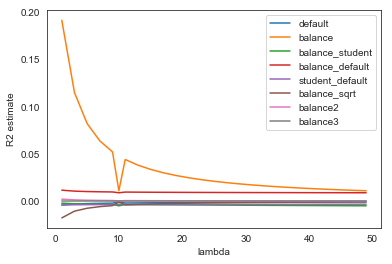

In [54]:
# Store estimates.
estimates = np.append(ridgeregrBig.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregrBig.coef_,[lambd])))
    
# Make the data pretty.
estimates_df2 = pd.DataFrame(
    estimates,
    columns=list(X_train2.columns) + ['lambda'])
estimates_df2.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df2.columns[:9,])
varstoplot.remove('student')

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df2['lambda'], estimates_df2[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('R2 estimate')
plt.legend(labels)
plt.show()

### Regularization parameter vs. Lambda - Lasso

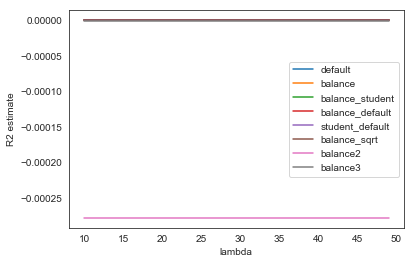

In [55]:
# Store estimates.
estimates = np.append(lassBig.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for R2 in range(1, 50, 2):
    lassBig = linear_model.Lasso(alpha=.35)
    lassBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append(lassBig.coef_,[lambd])))
    
# Make the data pretty.
estimates_df3 = pd.DataFrame(
    estimates,
    columns=list(X_train2.columns) + ['lambda'])
estimates_df3.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
varstoplot.remove('student')

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df3['lambda'], estimates_df3[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('R2 estimate')
plt.legend(labels)
plt.show()